In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
store_data = pd.read_csv("store.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submission_data = pd.read_csv("sample_submission.csv")

In [3]:
# shape for each data
print(f'\t Store shape: {store_data.shape}\n')
print(f'\t Train shape: {train_data.shape}\n')
print(f'\t Test shape: {test_data.shape}\n')
print(f'\t Submission shape: {submission_data.shape}')

	 Store shape: (1115, 10)

	 Train shape: (1017209, 9)

	 Test shape: (41088, 8)

	 Submission shape: (41088, 2)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [6]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [7]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,17-09-2015,1.0,1,0,0
1,2,3,4,17-09-2015,1.0,1,0,0
2,3,7,4,17-09-2015,1.0,1,0,0
3,4,8,4,17-09-2015,1.0,1,0,0
4,5,9,4,17-09-2015,1.0,1,0,0


In [8]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
# drop missing value
test_data = test_data.dropna()

In [11]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [15]:
for i in store_data.columns:
    if store_data[i].dtypes=="object":
        store_data[i].fillna(store_data[i].mode()[0],inplace=True)
    elif store_data[i].dtypes !="object":
        store_data[i].fillna(store_data[i].mean(),inplace=True)

In [16]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [17]:
submission_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [18]:
submission_data.info

<bound method DataFrame.info of           Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]>

# Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

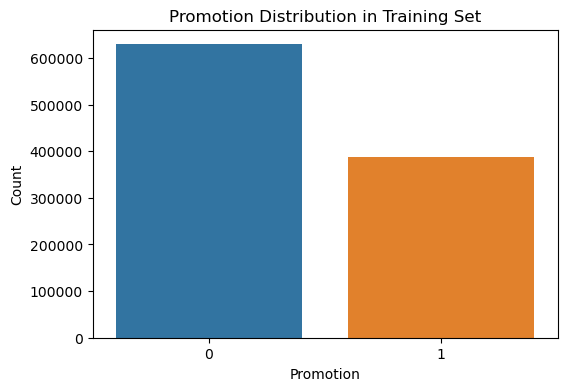

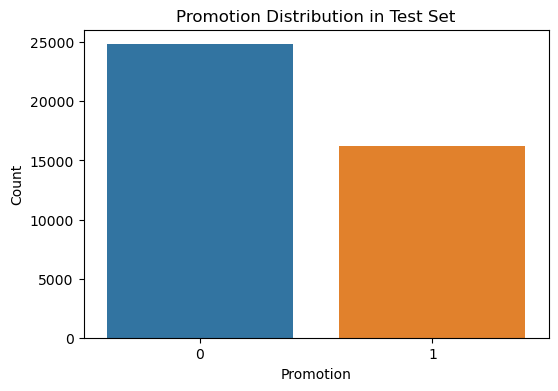

In [19]:
# Check the distribution of promotions in the training set
plt.figure(figsize=(6, 4))
sns.countplot(x='Promo', data=train_data)
plt.title('Promotion Distribution in Training Set')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()

# Check the distribution of promotions in the test set
plt.figure(figsize=(6, 4))
sns.countplot(x='Promo', data=test_data)
plt.title('Promotion Distribution in Test Set')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()


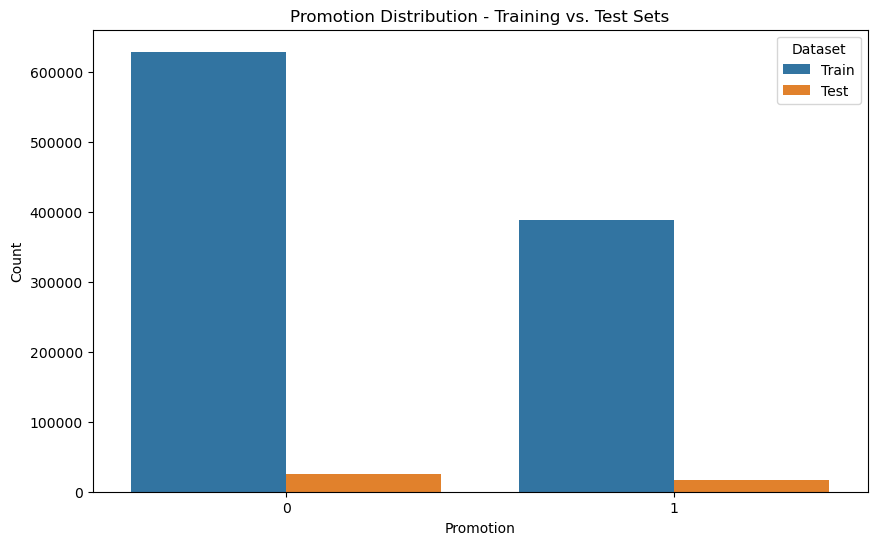

In [20]:
# Compare promotion distribution between training and test sets
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', hue='Dataset', data=pd.concat([train_data.assign(Dataset='Train'), test_data.assign(Dataset='Test')]))
plt.title('Promotion Distribution - Training vs. Test Sets')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()


# Check & compare sales behavior before, during and after holidays?

In [21]:
# Create "Year", "Month" & "DayOfMonth" columns (pandas datetime) 
train_data['Date']= pd.to_datetime(train_data['Date'])
print(train_data['Date'])

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]


In [22]:
train_data['Holiday'] = train_data['SchoolHoliday'].apply(lambda x: 1 if x != '0' else 0)
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [23]:
# Define functions to identify each occasion
def is_christmas(date):
    return date.month == 12 and date.day == 25

def is_easter(date):
    return date.month == 4 and date.day == 9

def is_labour_day(date):
    return date.month == 5 and date.day == 1

def is_good_friday(date):
    return date.month == 4 and date.day == 7

In [24]:
# Sales before holiday, during holiday, and after holidays
before_holiday_sales = train_data[train_data['Holiday'] == 0]['Sales']
during_holiday_sales = train_data[train_data['Holiday'] == 1]['Sales']
after_holiday_sales = train_data[train_data['Holiday'].shift(-1) == 1]['Sales']  

In [25]:
# Create new columns to indicate each occasion
train_data['Christmas'] = train_data['Date'].apply(lambda x: 1 if is_christmas(x) else 0)
train_data['Easter'] = train_data['Date'].apply(lambda x: 1 if is_easter(x) else 0)
train_data['Labour Day'] = train_data['Date'].apply(lambda x: 1 if is_labour_day(x) else 0)
train_data['Good Friday'] = train_data['Date'].apply(lambda x: 1 if is_good_friday(x) else 0)


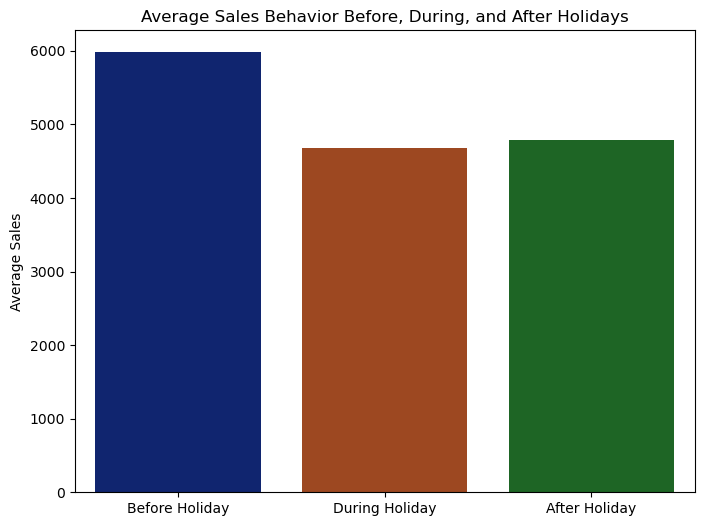

In [26]:
# Calculate the average sales 
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()
# Bar Plot to visualise the average sales behavior before, during, and after holidays 
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
            palette='dark')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()


In [27]:
# Calculate the total sales for each group
total_sales_before_holiday = before_holiday_sales.sum()
total_sales_during_holiday = during_holiday_sales.sum()
total_sales_after_holiday = after_holiday_sales.sum()

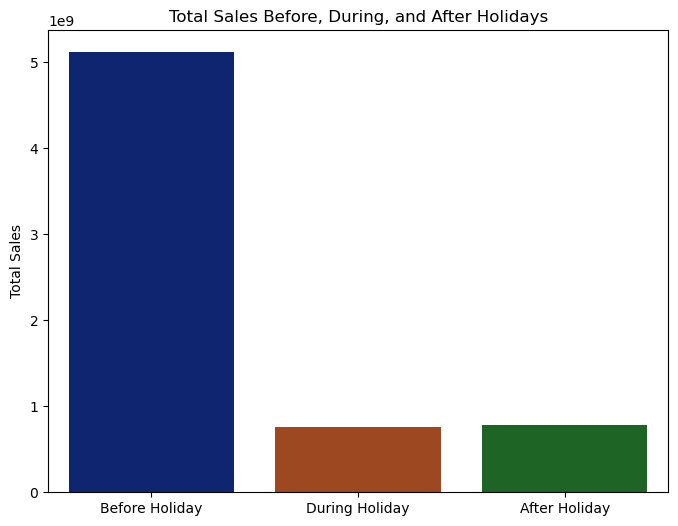

In [28]:
# Plot the total sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[total_sales_before_holiday, total_sales_during_holiday, total_sales_after_holiday],
            palette='dark')
plt.title('Total Sales Before, During, and After Holidays')
plt.ylabel('Total Sales')
plt.show()

# Find out any seasonal (Christmas, Easter etc) purchase behaviours

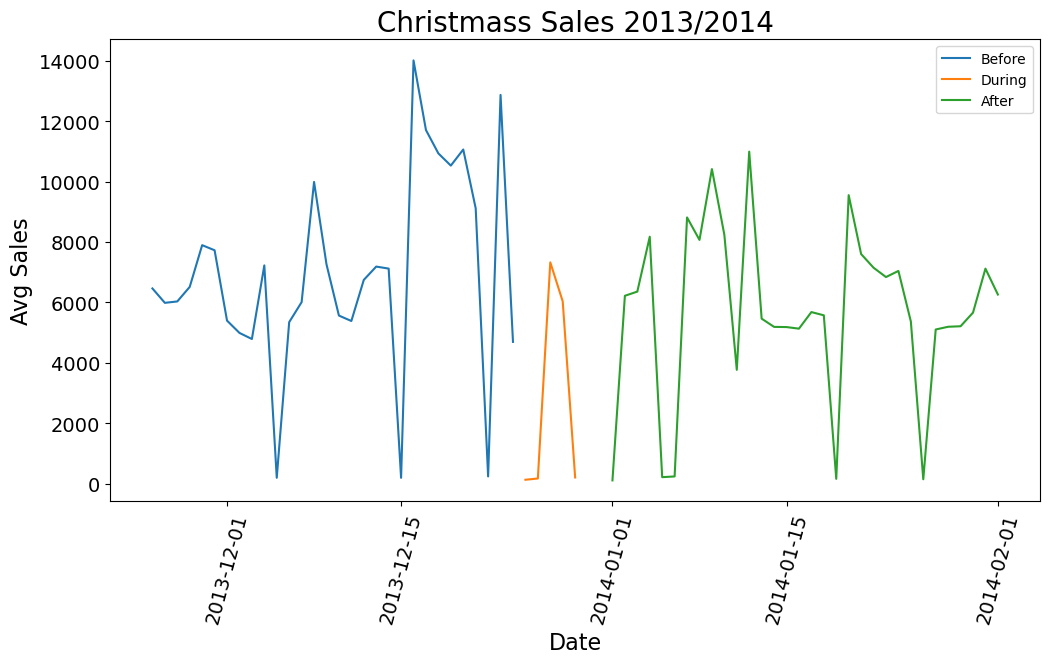

In [29]:
before_index = (train_data["Date"] >= pd.to_datetime("2013-11-25")) & (train_data["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = train_data[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_data["Date"] >= pd.to_datetime("2013-12-25")) & (train_data["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = train_data[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_data["Date"] >= pd.to_datetime("2014-01-01")) & (train_data["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = train_data[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2013/2014", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()

* 1 month before christamss has a very high sales behavior especially the last two weeks before christmass has the highest peak of sales through the 2 month christmas period
* 2 during 5 days of christmass the sales gets lower.
* 3 then it satys low for two weeks after dec-30 then starts rising slowly for the next 1 month

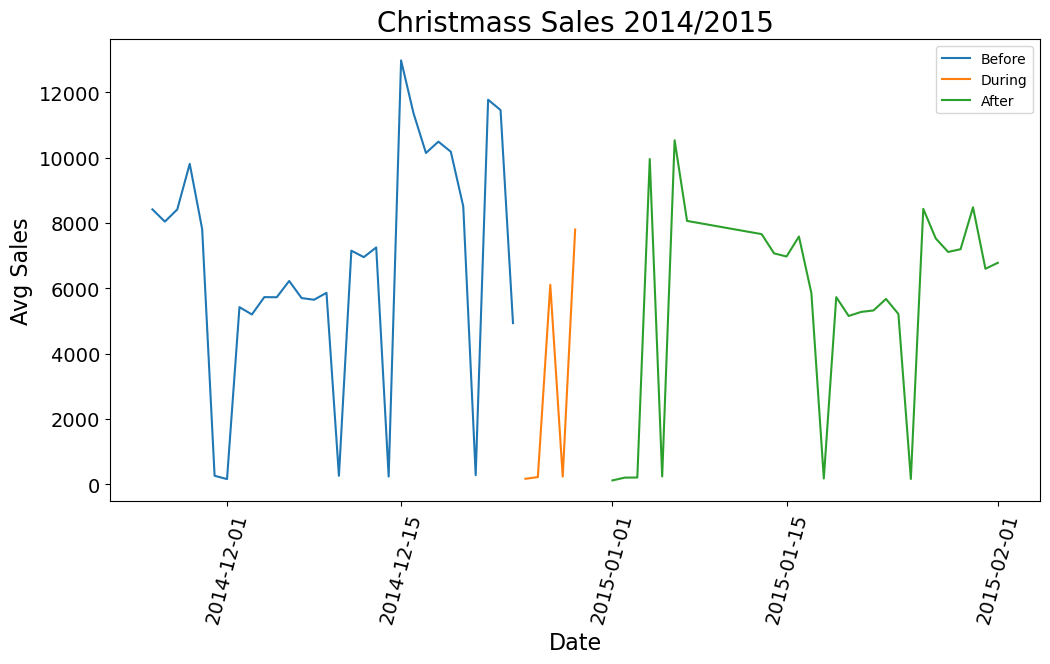

In [30]:
before_index = (train_data["Date"] >= pd.to_datetime("2014-11-25")) & (train_data["Date"] < pd.to_datetime("2014-12-25"))
before_xmass = train_data[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_data["Date"] >= pd.to_datetime("2014-12-25")) & (train_data["Date"] < pd.to_datetime("2014-12-30"))
during_xmass = train_data[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_data["Date"] >= pd.to_datetime("2015-01-01")) & (train_data["Date"] < pd.to_datetime("2015-02-02"))
after_xmass = train_data[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()


* Christmass behaviour on 2014/15 has the same pattern as 2013/2014

# What can you say about the correlation between sales and number of customers?

In [31]:
correlation = train_data["Sales"].corr(train_data["Customers"])
print("Correlation between Sales and Number of Customers:", correlation)


Correlation between Sales and Number of Customers: 0.894710773301698


Text(0.5, 1.0, 'Sales vs Customers')

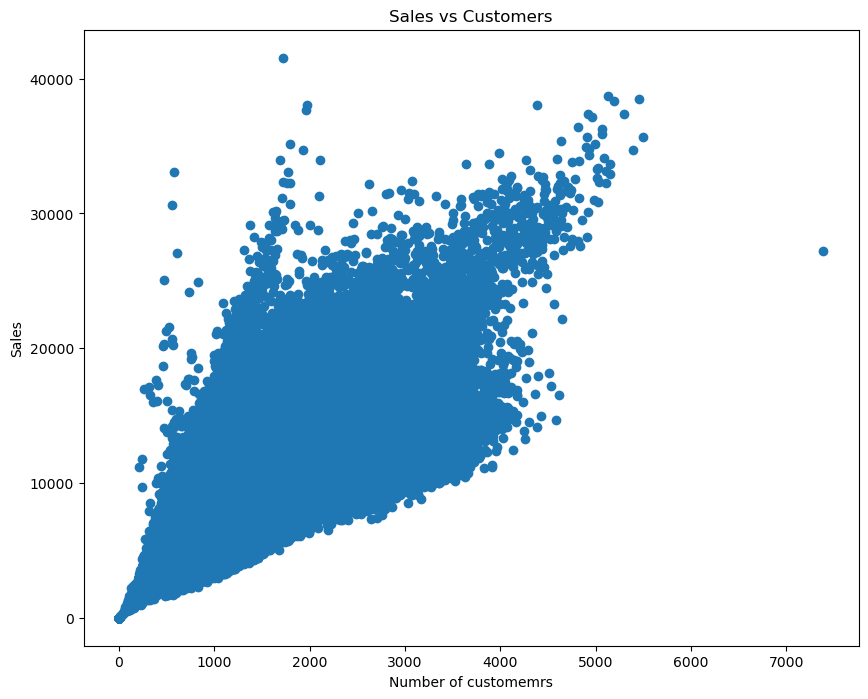

In [32]:
plt.figure(figsize= (10, 8))
plt.scatter( train_data['Customers'], train_data['Sales'])
plt.ylabel("Sales")
plt.xlabel("Number of customemrs")
plt.title("Sales vs Customers")

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


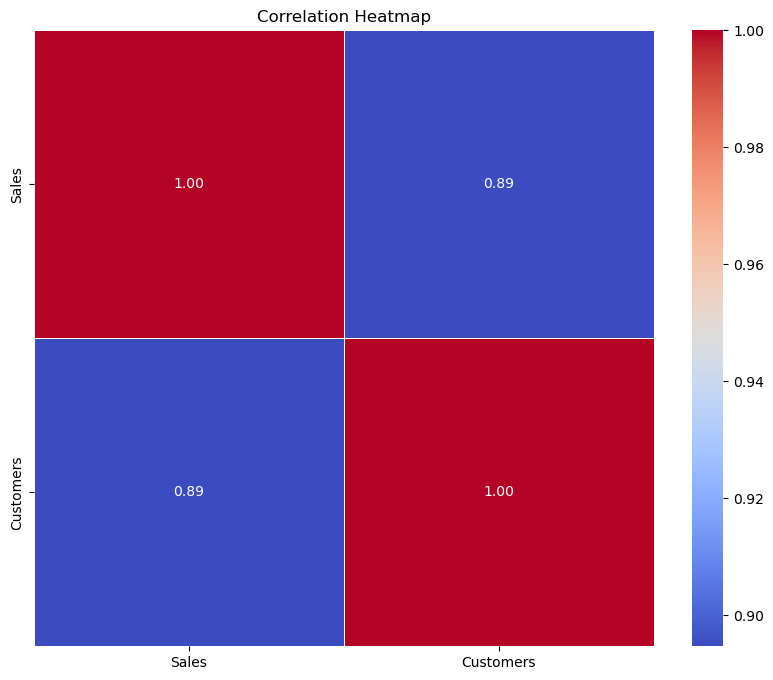

In [33]:
sales_customers_corr = train_data[["Sales", "Customers"]].corr()
display(sales_customers_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(sales_customers_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [34]:
promo_effect = train_data.groupby("Promo").agg({
    "Sales": "mean",
    "Customers": "mean"
}).reset_index()
print("Promotion Effect on Sales and Customers:")
print(promo_effect)

Promotion Effect on Sales and Customers:
   Promo        Sales   Customers
0      0  4406.050805  517.823542
1      1  7991.152046  820.098815


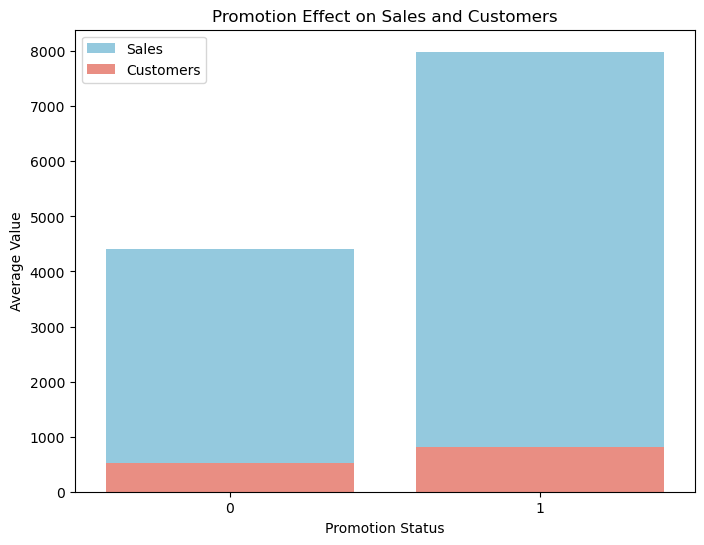

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Promo", y="Sales", data=promo_effect, ci=None, color='skyblue', label='Sales')
sns.barplot(x="Promo", y="Customers", data=promo_effect, ci=None, color='salmon', label='Customers')
plt.xlabel("Promotion Status")
plt.ylabel("Average Value")
plt.title("Promotion Effect on Sales and Customers")
plt.legend()
plt.show()






Average Sales during Promotion: 7991.15
Average Sales without Promotion: 4406.05
Average Customers during Promotion: 820.10
Average Customers without Promotion: 517.82


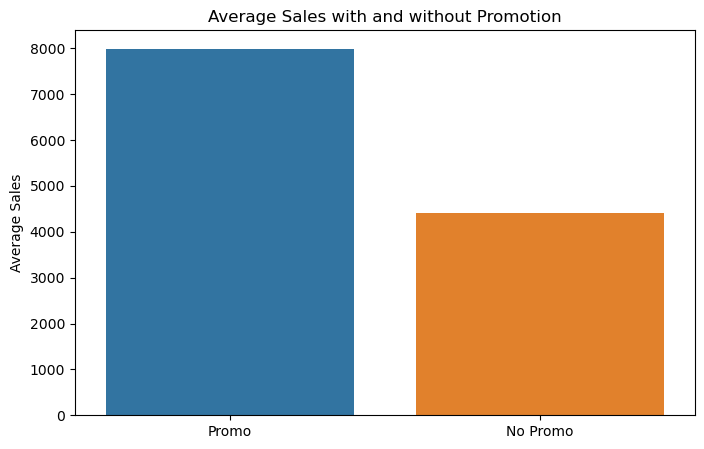

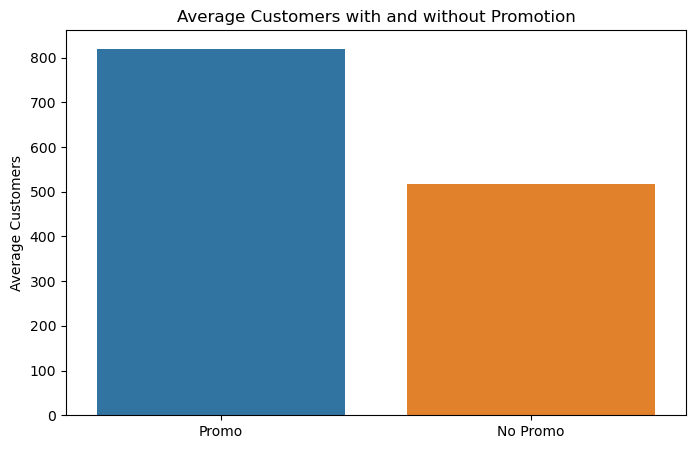

In [36]:



# Calculate the average sales and average number of customers during promotional and non-promotional periods
average_sales_promo = train_data[train_data["Promo"] == 1]["Sales"].mean()
average_sales_no_promo = train_data[train_data["Promo"] == 0]["Sales"].mean()

average_customers_promo = train_data[train_data["Promo"] == 1]["Customers"].mean()
average_customers_no_promo = train_data[train_data["Promo"] == 0]["Customers"].mean()

# Print the results
print(f"Average Sales during Promotion: {average_sales_promo:.2f}")
print(f"Average Sales without Promotion: {average_sales_no_promo:.2f}")

print(f"Average Customers during Promotion: {average_customers_promo:.2f}")
print(f"Average Customers without Promotion: {average_customers_no_promo:.2f}")

#  Plot the results

# Plot the average sales with and without promotion
plt.figure(figsize=(8, 5))
sns.barplot(x=["Promo", "No Promo"], y=[average_sales_promo, average_sales_no_promo])
plt.title("Average Sales with and without Promotion")
plt.ylabel("Average Sales")
plt.show()

# Plot the average number of customers with and without promotion
plt.figure(figsize=(8, 5))
sns.barplot(x=["Promo", "No Promo"], y=[average_customers_promo, average_customers_no_promo])
plt.title("Average Customers with and without Promotion")
plt.ylabel("Average Customers")
plt.show()


Overall, the analysis indicates that promotions play a crucial role in driving both sales and customer engagement. They not only bring in new customers but also encourage existing customers to spend more, leading to higher revenue for the business. It suggests that strategic and well-timed promotions can be an effective marketing tool for boosting sales and expanding customer base. However, other factors such as the type of promotion, product offerings, and market conditions should also be considered to develop a comprehensive marketing strategy that maximizes the benefits of promotions.

# Trends of customer behavior during store open and closing times ?

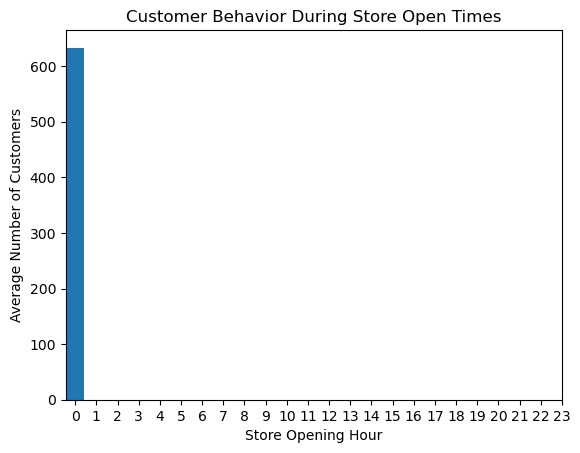

In [37]:
# Create a new column "Open_Hour" with the hour of the store's opening time
train_data['Open_Hour'] = pd.to_datetime(train_data['Open']).dt.hour

# Plot the average number of customers vs. store opening hour

average_customers_by_hour = train_data.groupby('Open_Hour')['Customers'].mean()
plt.bar(average_customers_by_hour.index, average_customers_by_hour.values)
plt.xlabel('Store Opening Hour')
plt.ylabel('Average Number of Customers')
plt.title('Customer Behavior During Store Open Times')
plt.xticks(np.arange(0, 24))
plt.show()


<Figure size 1200x700 with 0 Axes>

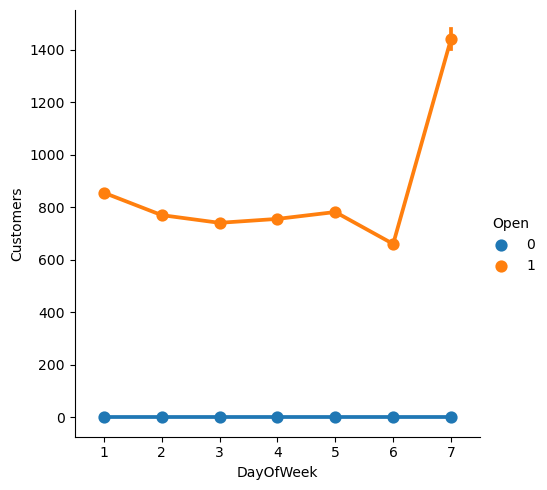

In [38]:
plt.figure(figsize=(12,7))
sns.factorplot(data =train_data, x ="DayOfWeek", y = "Customers",
               hue = 'Open',
              sharex=False)

# Which stores are opened on all weekdays? How does that affect their sales on weekends? 


Stores That work all Week are : 33


<Figure size 1200x700 with 0 Axes>

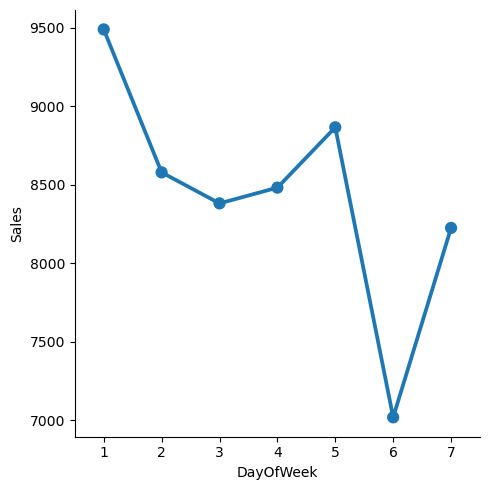

In [39]:
# stores, where their unique DayOfWeek count to 7
open_stores = train_data[train_data.Open == 1]
each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()

all_week_stores = each_day[each_day.DayOfWeek == 7]
stores_id = all_week_stores.reset_index()['Store']

get_stores = open_stores[(open_stores.Store.isin(set(stores_id)))]
get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

plt.figure(figsize=(12,7))
sns.factorplot(data = week_sales, x ="DayOfWeek", y = "Sales",
              sharex=False)
print(f'Stores That work all Week are : {all_week_stores.shape[0]}')

#### Insight :-> we have about 33 stores that work on all weekdays, and the sales on week ends show rise from Saturday to sunday

# Check how the assortment type affects sales ?

In [40]:
store_data['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [41]:
train_df = pd.merge(train_data,store_data,how="inner",on="Store")


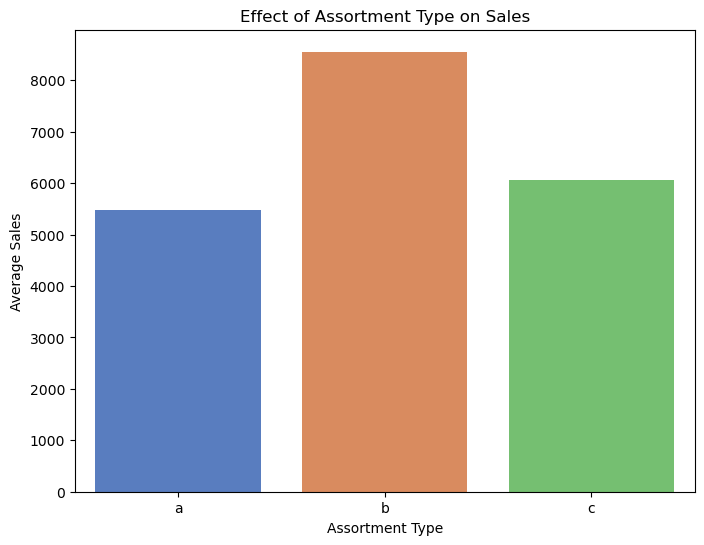

In [42]:

assortment_effect = train_df.groupby('Assortment')['Sales'].mean().reset_index()

# Create a bar plot to visualize the effect of assortment type on sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='Sales', data=assortment_effect, palette='muted')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.title('Effect of Assortment Type on Sales')
plt.show()


# How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?


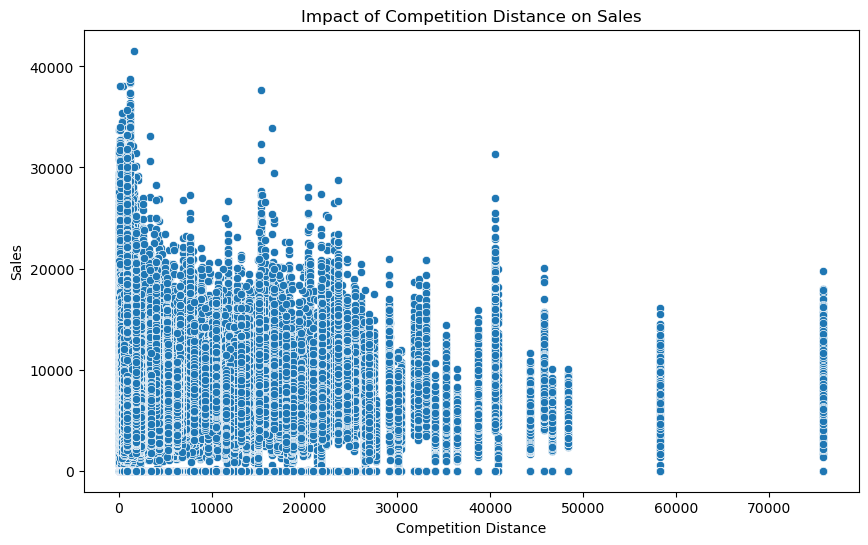

In [104]:
merged_df = pd.merge(train_data, store_data, on="Store")

# Plot the relationship between CompetitionDistance and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x="CompetitionDistance", y="Sales", data=merged_df)
plt.title("Impact of Competition Distance on Sales")
plt.xlabel("Competition Distance")
plt.ylabel("Sales")
plt.show()

# How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance ?


In [93]:
has_open_competition_df = train_df[train_df['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")

has_open_competition_df["CompetitionOpenSinceDate"] = has_open_competition_df["CompetitionOpenSinceYear"] + "-" + has_open_competition_df["CompetitionOpenSinceMonth"] + "-" + "01" 
has_open_competition_df["CompetitionOpenSinceDate"] =  pd.to_datetime(has_open_competition_df["CompetitionOpenSinceDate"])

competition_df = has_open_competition_df[["Date", "Sales", "Store", "CompetitionOpenSinceDate"]]


competition_df["BeforeCompetition"] = competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]

competition_df_agg = competition_df.groupby("BeforeCompetition").agg({"Sales": "mean"})

In [94]:

x_col = []
for val in competition_df_agg.index.to_list():
    if (val):
        x_col.append("Before")
    else:
        x_col.append("After")


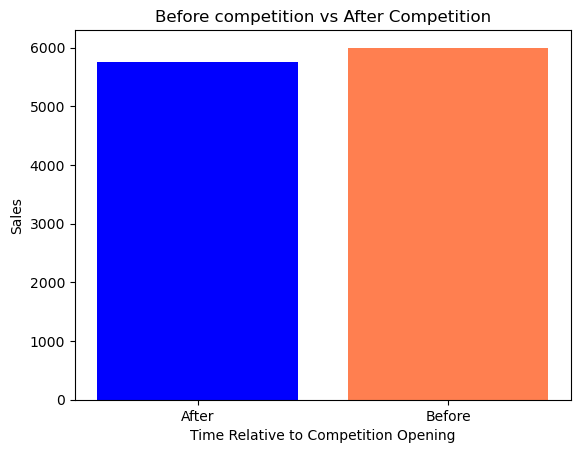

In [101]:
plot_df = pd.DataFrame({"x_col": x_col, "Sales_mean": competition_df_agg["Sales"]})

# Plot the bar graph
plt.bar(plot_df["x_col"], plot_df["Sales_mean"],color = ["Blue", "coral"])
plt.xlabel("Time Relative to Competition Opening")
plt.ylabel("Sales")

plt.title("Before competition vs After Competition")
plt.show()

In [92]:
print("Overall avg sales before competition and after competition")
display(competition_df_agg)

decrease = competition_df_agg["Sales"][True] - competition_df_agg["Sales"][False]
decrease_percent = decrease / competition_df_agg["Sales"][True]

print(f"Overall avg sales decreased after competition by {decrease_percent * 100:.3f}%")

Overall avg sales before competition and after competition


,Sales
BeforeCompetition,
False,5753.701751
True,5998.382899


Overall avg sales decreased after competition by 4.079%


##### * As we can observe from the graph the sales has dropped when new competition is opened.

##### * But the effect is not that much, it only decreased by 4.079%